In [1]:
!pip install gurobipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 4.2 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:

import os
import sys
# path = os.path.dirname(os.getcwd())
# sys.path.insert(0, path)

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/SVR_CG')
from Codes.model import *
from Codes.utils import *

from scipy import stats
import pickle
sys.path.append('/content/gdrive/MyDrive/SVR_Codes/DatasetsResult')
RESULT_DIR = "/content/gdrive/MyDrive/SVR_Codes/DatasetsResult"

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/Datasets')
DATA_DIR = "/content/gdrive/MyDrive/SVR_Codes/Datasets"

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/DatasetsInfo')
DATAINFO_DIR = "/content/gdrive/MyDrive/SVR_Codes/DatasetsInfo"

import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets

from sklearn.preprocessing import StandardScaler



In [ ]:
df = pd.read_csv(os.path.join(DATA_DIR, 'ceosalaries.csv')) 

In [ ]:
df

,Rank,Name,Company,Compensation,Five.Year.Comp,Shares.Owned...mil.,Age,Efficiency
0,1,John H Hammergren,McKesson,131.190,285.020,51.9,53,121.0
1,2,Ralph Lauren,Ralph Lauren,66.650,204.060,5010.4,72,84.0
2,3,Michael D Fascitelli,Vornado Realty,64.405,NaN,171.7,55,NaN
3,4,Richard D Kinder,Kinder Morgan,60.940,60.940,8582.3,67,NaN
4,5,David M Cote,Honeywell,55.790,96.110,21.5,59,138.0
...,...,...,...,...,...,...,...,...
495,496,Andrew D Mason,Groupon,0.185,NaN,775.4,32,NaN
496,497,Richard D Fairbank,Capital One Financial,0.160,92.810,121.7,61,186.0
497,498,Malon Wilkus,American Capital Agency,0.000,NaN,0.0,60,NaN
498,498,Matthew J Lambiase,Chimera Investment,0.000,NaN,1.6,45,NaN


In [ ]:
df = df.loc[:,['Age','Compensation']]
df

,Age,Compensation
0,53,131.190
1,72,66.650
2,55,64.405
3,67,60.940
4,59,55.790
...,...,...
495,32,0.185
496,61,0.160
497,60,0.000
498,45,0.000


In [4]:
df = pd.read_csv(os.path.join(DATA_DIR, 'ceosalaries.csv')) 
df = df.loc[:,['Age','Compensation']]

f = 1
K = 6
X = df.iloc[:,0:f]
y = df.iloc[:,f:f+1]

cols = [ 'X' + str(i+1) for i in range(f) ]
cols+=['Y']

scaler = StandardScaler()
df_data = scaler.fit_transform(np.c_[X,y])
df_data = pd.DataFrame(df_data, columns = cols)



In [ ]:
df_data

,X1,Y
0,-0.644389,10.542255
1,2.433386,4.905823
2,-0.320413,4.709762
3,1.623445,4.407156
4,0.327540,3.957394
...,...,...
495,-4.046140,-0.898723
496,0.651516,-0.900906
497,0.489528,-0.914879
498,-1.940294,-0.914879


In [ ]:

# EM Greedy

weights_list_greedy = []
bias_list_greedy = []
metrics_list = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)
    greedy = CLR(K =K , f = f, max_iter= 30, compute = True, random_state=seed )
    greedy.set_model(Cl_SVR_greedy(Kmeans_init = False, outputFlag=False, tol = 0.05, time = 0.5, step_plots=False))

    greedy.fit(df_data )


    time_list.append(greedy.run_time) 
    epsVal_list.append(greedy.model_optVal)
    weights_list_greedy.append(greedy.weights)
    bias_list_greedy.append(greedy.bias)


print("\n\nResults for EM Greedy" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_greedy = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for EM Greedy: ", epsVal_result_greedy)


time_result_greedy = np.mean(time_list)
print("Average time taken for EM Greedy ", time_result_greedy, "\n")

Clusterwise-Regression model with SVR - Greedy algorithm
# of outliers:  0
Iteration:  0
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 30
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 30
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeL

In [ ]:

# KM LR Greedy

weights_list_kmlr = []
bias_list_kmlr = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)

    kmlr = CLR(K =K , f = f, random_state=seed )
    kmlr.set_model(km_lr())
    kmlr.fit(df_data )

    time_list.append(kmlr.run_time) 
    epsVal_list.append(kmlr.model_optVal)
    weights_list_kmlr.append(kmlr.weights)
    bias_list_kmlr.append(kmlr.bias)


print("\n\nResults for kmlr" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmlr = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmlr: ", epsVal_result_kmlr)


time_result_kmlr = np.mean(time_list)
print("Average time taken for kmlr ", time_result_kmlr, "\n")

Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  10.543105910668254
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  10.655411763293847
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  10.543105910668254
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  10.655411763293847
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  10.68049011759151
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  10.684011505115516
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  10.684011505115516
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  10.655411763293847
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  10.684011505115516
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  10.684011505115516


Results for kmlr

M

In [ ]:

# KM SVR Greedy

weights_list_kmsvr = []
bias_list_kmsvr = []
metrics_list = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)
    print(seed)
    kmsvr = CLR(K =K , f = f, random_state=seed )
    kmsvr.set_model(km_svr(epsilon = 6))
    kmsvr.fit(df_data )

    time_list.append(kmsvr.run_time) 
    epsVal_list.append(kmsvr.model_optVal)
    weights_list_kmsvr.append(kmsvr.weights)
    bias_list_kmsvr.append(kmsvr.bias)


print("\n\nResults for kmsvr" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmsvr = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmsvr ", epsVal_result_kmsvr)


time_result_kmsvr = np.mean(time_list)
print("Average time taken for kmsvr ", time_result_kmsvr, "\n")

51
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  5.688612301735946
135
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  5.688612301735946
28
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  5.688612301735946
130
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  5.688612301735946
46
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  5.688612301735946
254
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  5.688612301735946
38
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  5.688612301735946
71
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  5.688612301735946
133
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  5.688612301735946
101
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  5.6

In [5]:

# KM et Greedy

weights_list_kmet = []
bias_list_kmet = []
metrics_list = []
time_list=[]
epsVal_list = []


for j in range(10):
    seed = np.random.randint(2**8)
    print(seed)
    kmet = CLR(K =K , f = f, compute = True, random_state=seed )
    kmet.set_model(km_et(outputFlag= False))
    kmet.fit(df_data )

    time_list.append(kmet.run_time) 
    epsVal_list.append(kmet.model_optVal)
    weights_list_kmet.append(kmet.weights)
    bias_list_kmet.append(kmet.bias)


print("\n\nResults for kmet" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmet = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmet ", epsVal_result_kmet)


time_result_kmet = np.mean(time_list)
print("Average time taken for kmet ", time_result_kmet, "\n")

168
Clusterwise-Regression model with Kmeans-et
# of outliers:  0
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set pa

In [6]:


with open(os.path.join(RESULT_DIR, 'Ceosalaries3.pkl'), 'wb') as outp:

    pickle.dump(weights_list_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmet, outp, pickle.HIGHEST_PROTOCOL)



In [ ]:

# kplane Greedy

weights_list_kp = []
bias_list_kp = []
time_list = []
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)

    kp = CLR(K =K , f = f, max_iter= 20, random_state=seed )
    kp.set_model(k_plane())
    kp.fit(df_data )

    time_list.append(kp.run_time) 
    epsVal_list.append(kp.model_optVal)
    weights_list_kp.append(kp.weights)
    bias_list_kp.append(kp.bias)


print("\n\nResults for k plane" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kp = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for k plane: ", epsVal_result_kp)


time_result_kp = np.mean(time_list)
print("Average time taken for k plane ", time_result_kp, "\n")

Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.6117224015544034
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.8198623177434121
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.5581499956634524
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.8683374801803687
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  4.9391964471970535
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.320129152007034
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.7447903528526725
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.5581499956634524
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.5581499956634524
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  2.0432710948921997


Results for k plane

In [ ]:

# Clusterwise SVR with constraint generation 

optcg = CLR(K =K , f = f, max_iter= 30, compute = True, random_state=123)
optcg.set_model(Cl_SVR_Cg(outputFlag=False, initConstrCnt=7, optimalGap= 0.05, tol = 0.2, time = 2, initConstrIntRatio= 4, outliersCnt = 0, step_plots=False))

optcg.fit(df_data )


weights_optcg = optcg.weights
bias_optcg = optcg.bias
optgap_optcg = optcg.model_optGap
optVal_optcg = optcg.model_optVal


print("\n\nResults for CG" )

print("EpsVal for CG: ", optVal_optcg)

time_result_optcg = optcg.run_time
print("Time taken for CG ", time_result_optcg, "\n")


Clusterwise-Regression model with SVR - Constraint generation
# of outliers:  0
greedy objective:  0.15334322312073823
greedy objective:  0.17443698464095944
greedy objective:  0.6233891567719203
greedy objective:  0.6246864946717903
greedy objective kmlr:  0.6190079429110501
Max error for warm starting model:  2.552091175805481
Number of WS constraints:  48
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-3.11319576]
 [ 0.00803308]
 [ 0.00853597]
 [ 0.06780745]
 [ 0.08176171]
 [ 0.83889952]]
b at WS:  [[ 5.98405463]
 [-0.25985093]
 [-0.64625492]
 [ 0.29628108]
 [ 1.01001964]
 [ 2.58727055]]
Set parameter TimeLimit to value 120
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w:  [[-21.9711137 ]
 [ -1.15531178]
 [  0.06514477]
 [  0.17836307]
 [  0.29497541]

Clusterwise-Regression model with SVR - MILP
# of outliers:  0
greedy objective:  0.14552311261313736
greedy objective:  0.1628664420774774
greedy objective:  0.6235700080492655
greedy objective:  0.6249167269475395
greedy objective kmlr:  0.6190726075831653
Max error for warm starting model:  1.7447903528526725
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-1.98301027]
 [-0.34921054]
 [ 0.03579012]
 [ 0.08931089]
 [ 0.21884265]
 [ 0.22316542]]
b at WS:  [[ 8.89717013]
 [ 2.85308046]
 [-0.67433775]
 [-0.35161241]
 [ 0.90118995]
 [ 0.14325886]]
Set parameter TimeLimit to value 600
Set parameter MIPGap to value 0.1
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
E:  0.6209331562516607


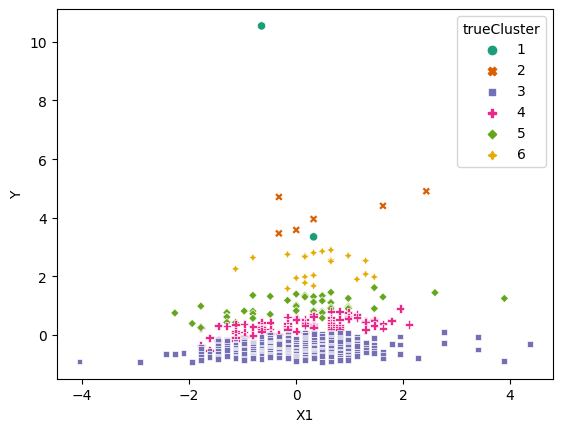

Solution reached with Cost:  0.6209331562516607


Results for full MILP
EpsVal for full MILP:  0.6209331562516607
Time taken for full MILP  600.2842182519998 



In [ ]:

# Clusterwise SVR with full MILP

optmilp = CLR(K =K , f = f,compute = True, random_state=243)
optmilp.set_model(Cl_SVR_milp(outputFlag=False, WarmStart=True, optimalGap= 0.1, time = 10))

optmilp.fit(df_data )

weights_optmilp = optmilp.weights
bias_optmilp = optmilp.bias
optgap_optmilp= optmilp.model_optGap
optVal_optmilp = optmilp.model_optVal


print("\n\nResults for full MILP" )

print("EpsVal for full MILP: ", optVal_optmilp)

time_result_optmilp = optmilp.run_time
print("Time taken for full MILP ", time_result_optmilp, "\n")


Clusterwise-Regression model with SVR - MILP
# of outliers:  0
greedy objective kmlr:  0.6190726075831653
Best WS is kmlr
Max error for warm starting model:  10.684011505115516
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-1.40827538]
 [-0.19249965]
 [-0.03200605]
 [ 0.08395248]
 [ 0.2700999 ]
 [ 0.50304925]]
b at WS:  [[ 5.25050271]
 [ 0.20090315]
 [ 0.28010105]
 [-0.08765881]
 [ 0.1464603 ]
 [ 0.04741324]]
Set parameter TimeLimit to value 240.224
Set parameter MIPGap to value 0.1
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
E:  0.6438579035816274


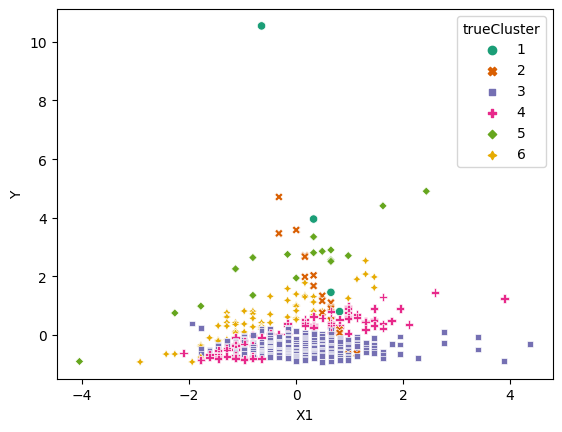

Solution reached with Cost:  0.6438579035816274


Results for full MILP
EpsVal for full MILP:  0.6438579035816274
Time taken for full MILP  240.504002528 



In [ ]:

# Clusterwise SVR with full MILP (time of cg)
time_result_optcg = 240.224
optmilp = CLR(K =K , f = f,compute = True, random_state=243)
optmilp.set_model(Cl_SVR_milp(outputFlag=False, WarmStart=True, optimalGap= 0.1, time = time_result_optcg/60))

optmilp.fit(df_data )

weights_optmilp = optmilp.weights
bias_optmilp = optmilp.bias
optgap_optmilp= optmilp.model_optGap
optVal_optmilp = optmilp.model_optVal


print("\n\nResults for full MILP" )

print("EpsVal for full MILP: ", optVal_optmilp)

time_result_optmilp = optmilp.run_time
print("Time taken for full MILP ", time_result_optmilp, "\n")


In [ ]:


with open(os.path.join(RESULT_DIR, 'Ceosalaries2.pkl'), 'wb') as outp:

    pickle.dump(weights_list_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmsvr, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optmilp, outp, pickle.HIGHEST_PROTOCOL)


In [ ]:

# Save the final results 


with open(os.path.join(RESULT_DIR, 'Ceosalaries.pkl'), 'wb') as outp:



    pickle.dump(weights_list_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_greedy, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_list_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    
    pickle.dump(weights_list_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kp, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optcg, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optmilp, outp, pickle.HIGHEST_PROTOCOL)



n, d = X.shape

with open(os.path.join(DATAINFO_DIR, 'Ceosalaries.pkl'), 'wb') as outp:

    pickle.dump(n, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(d, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(K, outp, pickle.HIGHEST_PROTOCOL)

